In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [120]:
data=pd.read_csv('/content/ParisHousingClass.csv')
data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [122]:
data.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [123]:
data.isna().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

In [124]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(data['category'])

LabelEncoder()

In [125]:
data['category']=le.transform(data['category'])

In [126]:
data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,0
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,1
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,0
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,0
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,1


In [127]:
corr=data.corr()
data_corr=corr['price'][:-1]
data_corr[abs(data_corr)>=0.0].sort_values(ascending=False)

price                1.000000
squareMeters         0.999999
numPrevOwners        0.016619
numberOfRooms        0.009591
cityPartRange        0.008813
hasStormProtector    0.007496
floors               0.001654
attic               -0.000600
hasGuestRoom        -0.000644
cityCode            -0.001539
hasStorageRoom      -0.003485
basement            -0.003967
hasPool             -0.005070
hasYard             -0.006119
made                -0.007210
isNewBuilt          -0.010643
garage              -0.017229
Name: price, dtype: float64

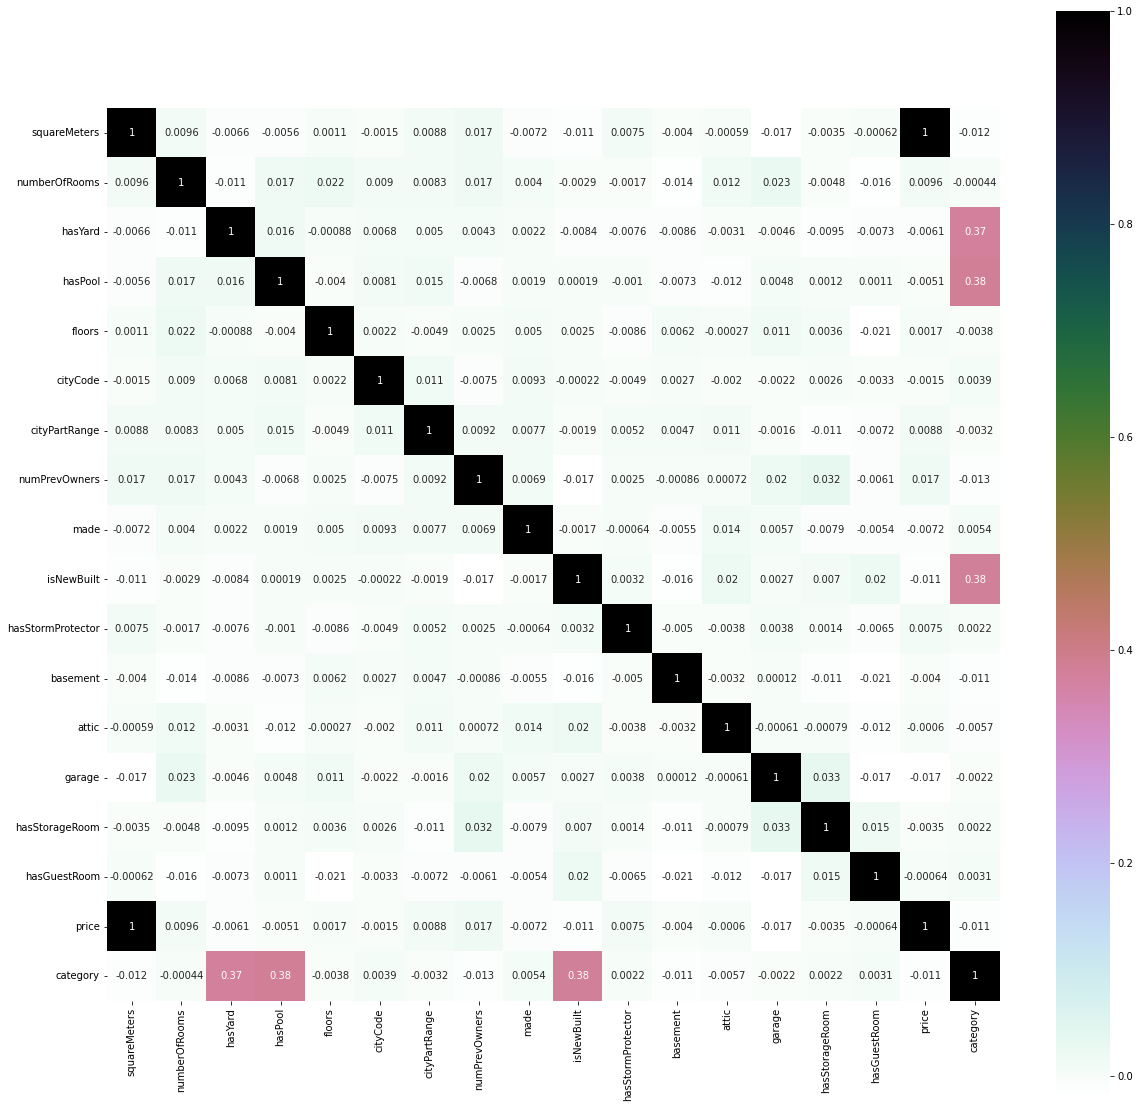

In [128]:
corr=data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='cubehelix_r',square=True)

In [129]:
#data.drop(['floors','attic','cityCode','numPrevOwners','garage'],axis=1,inplace=True)

In [130]:
from sklearn.model_selection import train_test_split
train, val=train_test_split(data,test_size=0.25)

In [131]:
train_x=data.drop(['price'],axis=1)
train_y=data['price']
val_x=val.drop(['price'],axis=1)
val_y=val['price']

In [132]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(train_x,train_y)



LinearRegression()

In [133]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
df_pred=lr.predict(val_x)

In [134]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
df_pred=lr.predict(val_x)
print("The model's metrics values are: ")
print("Accuracy: ", lr.score(val_x,val_y))
print("Mean Absolute Error: ",mean_absolute_error(df_pred , val_y))
print("Mean Squared Error: " ,mean_squared_error(df_pred,val_y))
print("R-squared score: ", r2_score(val_y,df_pred))


The model's metrics values are: 
Accuracy:  0.9999995576468003
Mean Absolute Error:  1494.1505968188737
Mean Squared Error:  3663662.295854565
R-squared score:  0.9999995576468003
